In [6]:
import pandas as pd

# Path to your CSV file
file_path = '/Users/antoinemunier/DEV/thesis/Data/cmsr_dataset_shuffled.csv'
df_base = pd.read_csv(file_path, nrows=10000)

In [7]:
df_base

,IE,BU,CT,FMI,fuel_H1,fuel_H2,fuel_H3,fuel_He3,fuel_He4,fuel_Li6,...,flow_Sr91,flow_Sr89,flow_Tc103,flow_Mo99,flow_Pr147,flow_Y95,flow_Sb132,flow_Sb129,AN,SF
0,11.00,12.176100,730.0,31,1.746580e-06,9.462870e-09,1.824010e-09,5.432780e-10,1.008170e-05,2.916550e-21,...,2.390800e-18,1.461953e-19,6.900941e-19,3.564941e-19,2.992588e-16,9.811765e-18,1.203576e-17,6.475765e-19,173.000,1.64700
1,19.00,21.626900,1.0,24,2.855400e-06,1.547670e-08,3.010090e-09,8.901390e-10,1.642240e-05,1.219670e-20,...,3.444300e-18,2.106159e-19,9.941824e-19,5.135824e-19,4.311265e-16,1.413529e-17,1.733929e-17,9.329294e-19,844.000,15.95000
2,20.00,0.040881,0.0,27,5.092890e-09,2.662800e-11,6.786190e-12,5.012610e-15,2.897440e-08,6.601160e-29,...,2.074750e-18,1.268691e-19,5.988676e-19,3.093676e-19,2.596985e-16,8.514706e-18,1.044471e-17,5.619706e-19,1.879,0.02484
3,11.75,6.066160,2920.0,2,8.377580e-07,4.493090e-09,6.558850e-10,4.690880e-10,4.827500e-06,3.517400e-22,...,7.310000e-20,4.470000e-21,2.110000e-20,1.090000e-20,9.150000e-18,3.000000e-19,3.680000e-19,1.980000e-20,55.060,0.26830
4,11.75,7.736500,1825.0,30,1.076840e-06,5.781020e-09,9.691140e-10,4.622030e-10,6.204280e-06,6.515850e-22,...,3.549650e-18,2.170579e-19,1.024591e-18,5.292912e-19,4.443132e-16,1.456765e-17,1.786965e-17,9.614647e-19,74.460,0.40450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18.00,18.857600,3650.0,31,2.485910e-06,1.339820e-08,1.526490e-09,1.852730e-09,1.441940e-05,7.977270e-21,...,1.442650e-18,8.821676e-20,4.164147e-19,2.151147e-19,1.805779e-16,5.920588e-18,7.262588e-18,3.907588e-19,228.000,1.11600
9996,11.00,9.406920,3650.0,19,1.335160e-06,7.233880e-09,9.252550e-10,9.119370e-10,7.745840e-06,1.455110e-21,...,3.338950e-18,2.041738e-19,9.637735e-19,4.978735e-19,4.179397e-16,1.370294e-17,1.680894e-17,9.043941e-19,117.900,0.62520
9997,19.25,22.769800,1825.0,16,3.016840e-06,1.625570e-08,2.317620e-09,1.695810e-09,1.748370e-05,1.523660e-20,...,5.998500e-19,3.668029e-20,1.731441e-19,8.944412e-20,7.508382e-17,2.461765e-18,3.019765e-18,1.624765e-19,278.800,1.58500
9998,14.25,20.528000,3650.0,32,2.820250e-06,1.526850e-08,1.701350e-09,2.044980e-09,1.658550e-05,1.182320e-20,...,2.180100e-18,1.333112e-19,6.292765e-19,3.250765e-19,2.728853e-16,8.947059e-18,1.097506e-17,5.905059e-19,369.200,2.40000


In [10]:
# Get all columns that start with 'fuel_' and include 'SF'
fuel_columns = [col for col in df_base.columns if col.startswith('fuel_')]
columns_to_keep = fuel_columns + ['SF']

# remove fuel_TOT_GS fuel_TOT_DH fuel_TOT_A
columns_to_keep = [col for col in columns_to_keep if col not in ['fuel_TOT_GS', 'fuel_TOT_DH', 'fuel_TOT_A']]

# Create new dataframe with only selected columns
df_filtered = df_base[columns_to_keep]

In [11]:
df_filtered

,fuel_H1,fuel_H2,fuel_H3,fuel_He3,fuel_He4,fuel_Li6,fuel_Li7,fuel_Be9,fuel_B10,fuel_B11,...,fuel_Pu245,fuel_Am239,fuel_Am240,fuel_Am245,fuel_Cm238,fuel_Cm239,fuel_Cm251,fuel_Bk249,fuel_Cf249,SF
0,1.746580e-06,9.462870e-09,1.824010e-09,5.432780e-10,1.008170e-05,2.916550e-21,7.931470e-22,1.884760e-16,1.746840e-23,1.576540e-14,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.289910e-23,4.967070e-23,1.64700
1,2.855400e-06,1.547670e-08,3.010090e-09,8.901390e-10,1.642240e-05,1.219670e-20,3.530070e-21,4.859920e-16,7.779680e-23,4.189940e-14,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.182660e-22,2.399480e-25,15.95000
2,5.092890e-09,2.662800e-11,6.786190e-12,5.012610e-15,2.897440e-08,6.601160e-29,1.819690e-29,1.364920e-21,4.553680e-31,1.150330e-19,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.02484
3,8.377580e-07,4.493090e-09,6.558850e-10,4.690880e-10,4.827500e-06,3.517400e-22,8.347020e-23,4.500800e-17,1.862930e-24,3.375670e-15,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,6.586710e-29,3.558110e-26,0.26830
4,1.076840e-06,5.781020e-09,9.691140e-10,4.622030e-10,6.204280e-06,6.515850e-22,1.425310e-22,6.501910e-17,3.046100e-24,4.761990e-15,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.873250e-27,3.992020e-25,0.40450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.485910e-06,1.339820e-08,1.526490e-09,1.852730e-09,1.441940e-05,7.977270e-21,2.310270e-21,3.635220e-16,5.131190e-23,3.171310e-14,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,2.001920e-26,5.337610e-23,1.11600
9996,1.335160e-06,7.233880e-09,9.252550e-10,9.119370e-10,7.745840e-06,1.455110e-21,3.902690e-22,1.139300e-16,9.298730e-24,9.566870e-15,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.822700e-27,4.859750e-24,0.62520
9997,3.016840e-06,1.625570e-08,2.317620e-09,1.695810e-09,1.748370e-05,1.523660e-20,3.830950e-21,5.612000e-16,8.296170e-23,4.458440e-14,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,3.329480e-24,1.688170e-22,1.58500
9998,2.820250e-06,1.526850e-08,1.701350e-09,2.044980e-09,1.658550e-05,1.182320e-20,2.845900e-21,4.670060e-16,5.434450e-23,3.356780e-14,...,0.0,0.0,0.0,1.613990e-33,0.0,0.0,0.0,4.236990e-25,1.129680e-21,2.40000


python(84826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(84827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Matplotlib is building the font cache; this may take a moment.


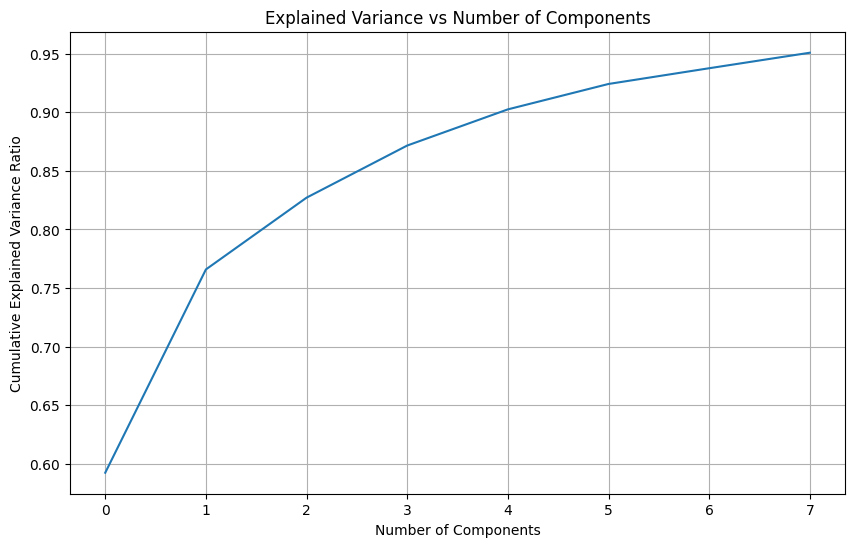

Number of components needed for 95% variance: 8


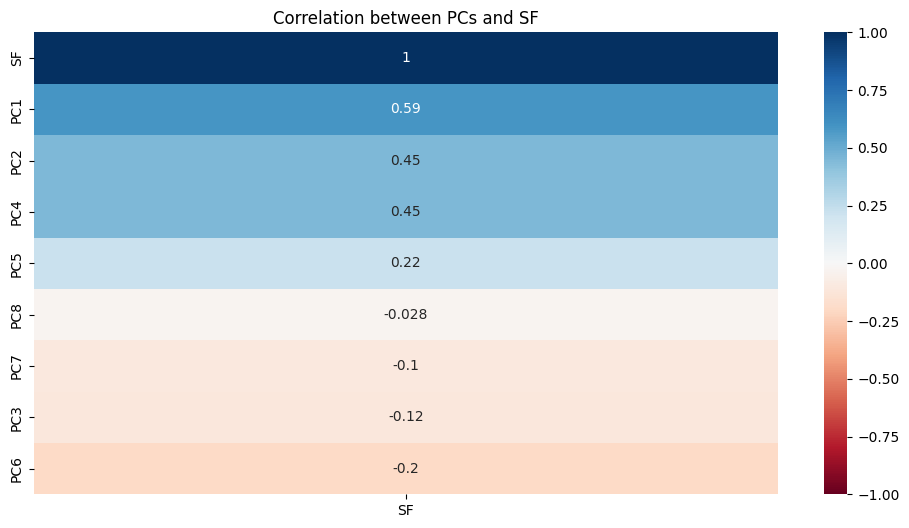


Top 10 features for PC1:
             Loading
fuel_As74   0.065490
fuel_Eu153  0.065472
fuel_Kr80   0.065417
fuel_Cd112  0.065379
fuel_Cd111  0.065371
fuel_Ce139  0.065346
fuel_Nb94   0.065301
fuel_Cd114  0.065300
fuel_Np237  0.065296
fuel_Pd105  0.065286

Top 10 features for PC2:
              Loading
fuel_Te129m  0.103003
fuel_Ru103   0.102812
fuel_Ce141   0.102200
fuel_Cd115m  0.101069
fuel_Sr89    0.100968
fuel_Te127m  0.100949
fuel_Zr95    0.100913
fuel_Y91     0.100723
fuel_Sb126   0.100459
fuel_Sn123   0.100408

Top 10 features for PC3:
             Loading
fuel_Rn218  0.110175
fuel_Tl210  0.110175
fuel_At218  0.110175
fuel_Bi214  0.110172
fuel_Po214  0.110172
fuel_Pb214  0.110172
fuel_Rn222  0.109532
fuel_Ra226  0.109502
fuel_Ra223  0.109159
fuel_Th227  0.108684


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Get all fuel columns (excluding SF which is our target)
fuel_columns = [col for col in df_filtered.columns if col.startswith('fuel_')]
X = df_filtered[fuel_columns]
y = df_filtered['SF']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit PCA
# We'll start with enough components to explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Print the number of components needed for 95% variance
print(f"Number of components needed for 95% variance: {pca.n_components_}")

# Create a dataframe with the transformed data
pca_cols = [f'PC{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)

# Add the target variable back
df_pca['SF'] = y

# Plot correlation between first few PCs and SF
plt.figure(figsize=(12, 6))
sns.heatmap(df_pca.corr()[['SF']].sort_values(by='SF', ascending=False), 
            annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between PCs and SF')
plt.show()

# Get the most important features for the first few components
n_components_to_analyze = 3
n_top_features = 10

for i in range(n_components_to_analyze):
    component_loadings = pd.DataFrame(
        pca.components_[i],
        columns=['Loading'],
        index=fuel_columns
    )
    
    print(f"\nTop {n_top_features} features for PC{i+1}:")
    print(component_loadings.abs().sort_values('Loading', ascending=False).head(n_top_features))

1. PC1 seems to be dominated by a mix of stable and long-lived isotopes (As-74, Eu-153, Kr-80, Cd isotopes, Np-237). This component might represent the overall fuel composition at equilibrium.
2. PC2 is heavily influenced by shorter-lived fission products (Te-129m, Ru-103, Ce-141, Sr-89, Zr-95). This suggests this component might be capturing the recent fission history or burnup state of the fuel.
PC3 is dominated by decay chain isotopes from the thorium and uranium series (Rn-218, Tl-210, At-218, Bi-214, etc.). This component appears to be capturing the decay chain dynamics in the fuel.


Top 5 PCs correlated with SF:
PC1: 0.592
PC2: 0.451
PC4: 0.447
PC5: 0.224
PC6: -0.197


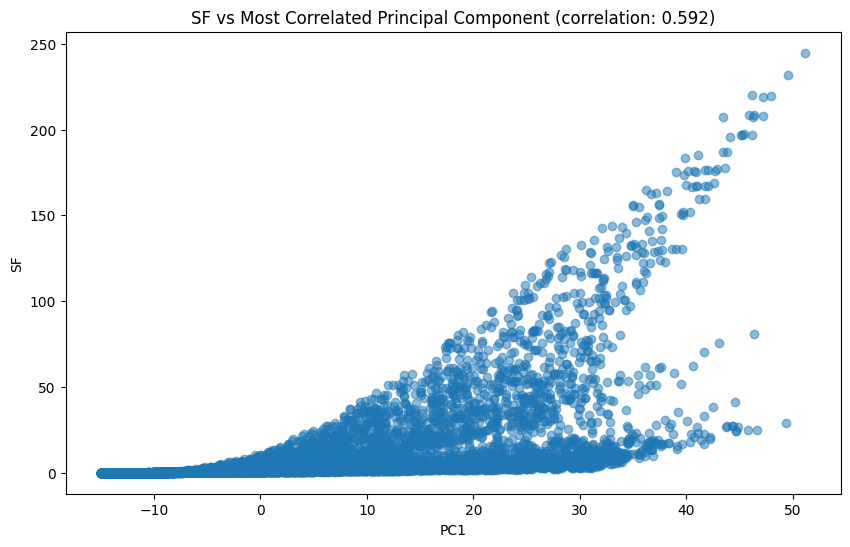

In [16]:
# Calculate correlation between PCs and SF
correlations = []
for i in range(pca.n_components_):
    corr = np.corrcoef(X_pca[:, i], y)[0,1]
    correlations.append((f'PC{i+1}', corr))

# Sort by absolute correlation
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

# Print top 5 most correlated components
print("\nTop 5 PCs correlated with SF:")
for pc, corr in correlations[:5]:
    print(f"{pc}: {corr:.3f}")

# Create a scatter plot of the most correlated PC vs SF
most_correlated_pc = int(correlations[0][0].replace('PC', '')) - 1

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, most_correlated_pc], y, alpha=0.5)
plt.xlabel(f'PC{most_correlated_pc + 1}')
plt.ylabel('SF')
plt.title(f'SF vs Most Correlated Principal Component (correlation: {correlations[0][1]:.3f})')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X = df_pca.drop('SF', axis=1)  # PCA transformed features
y = df_pca['SF']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom ResNet-style block
def residual_block(x, units, dropout_rate=0.3):
    # Store input for skip connection
    input_tensor = x
    
    # First dense layer
    x = layers.Dense(units, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    
    # Second dense layer
    x = layers.Dense(units, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    
    # If input dimensions don't match output dimensions, transform input
    if input_tensor.shape[-1] != units:
        input_tensor = layers.Dense(units)(input_tensor)
    
    # Add skip connection
    x = layers.Add()([x, input_tensor])
    x = layers.Activation('relu')(x)
    
    return x

# Build the model
def build_model(input_dim, n_blocks=3):
    inputs = layers.Input(shape=(input_dim,))
    
    # Initial dense layer
    x = layers.Dense(256, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Add residual blocks
    for i in range(n_blocks):
        x = residual_block(x, units=256, dropout_rate=0.3)
    
    # Final layers
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1)(x)  # Single output for regression
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = build_model(input_dim=X_train.shape[1])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean squared error for regression
    metrics=['mae']  # Mean absolute error
)

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience=10,
        monitor='val_loss',
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        factor=0.5,
        patience=5,
        monitor='val_loss',
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest MAE: {test_mae:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions and plot actual vs predicted values
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SF')
plt.ylabel('Predicted SF')
plt.title('Actual vs Predicted SF Values')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
df = df_base.copy()

In [4]:
import ast

df["fuel_value"] = df["fuel_value"].apply(ast.literal_eval)

In [5]:
df

,IE,BU,CT,FMI,fuel_TOT_GS,fuel_TOT_DH,fuel_TOT_A,AN,SF,fuel_value
0,10.0,0.00000,0.0,0,1.794450e+12,9.92946,1.285680e+13,0.8384,0.02793,"{'F19': 1.19531, 'Na23': 0.396987, 'K39': 0.26..."
1,10.0,0.00000,0.0,1,1.794450e+12,9.92946,1.285680e+13,0.8384,0.02793,"{'F19': 1.19531, 'Na23': 0.396987, 'K39': 0.26..."
2,10.0,0.00000,0.0,2,1.794450e+12,9.92946,1.285680e+13,0.8384,0.02793,"{'F19': 1.19531, 'Na23': 0.396987, 'K39': 0.26..."
3,10.0,0.00000,0.0,3,1.794450e+12,9.92946,1.285680e+13,0.8384,0.02793,"{'F19': 1.19531, 'Na23': 0.396987, 'K39': 0.26..."
4,10.0,0.00000,0.0,4,1.794450e+12,9.92946,1.285680e+13,0.8384,0.02793,"{'F19': 1.19531, 'Na23': 0.396987, 'K39': 0.26..."
...,...,...,...,...,...,...,...,...,...,...
9995,10.0,7.16507,1825.0,20,4.662800e+16,15553.60000,2.168680e+17,76.8000,0.44610,"{'H1': 1.03671e-06, 'H2': 5.62162e-09, 'H3': 9..."
9996,10.0,7.16507,1825.0,21,4.649130e+16,15533.50000,2.165760e+17,76.8200,0.44550,"{'H1': 1.03884e-06, 'H2': 5.63968e-09, 'H3': 9..."
9997,10.0,7.16507,1825.0,22,4.674300e+16,15571.10000,2.171930e+17,76.8600,0.44670,"{'H1': 1.03794e-06, 'H2': 5.58118e-09, 'H3': 9..."
9998,10.0,7.16507,1825.0,23,4.656900e+16,15545.60000,2.168680e+17,76.8400,0.44510,"{'H1': 1.0384e-06, 'H2': 5.61325e-09, 'H3': 9...."
